# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) K Means From Scratch
Week 7 | Morning Exercise 2.0

Writing your own k-means algorithm will reinforce your understanding of how it works, improve your Python skills, and it's not as hard as you think.

### Refresher on how the k-means works
The goal of the k-means algorithm is to put each data point into one of k clusters, minimizing the within-cluster-sum-of-squares, where sum-of-squares is referring to the sum of the squared errors between a data point and the centroid of the cluster.

In [3]:
from __future__ import division, print_function
import random
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.spatial import distance
%matplotlib inline

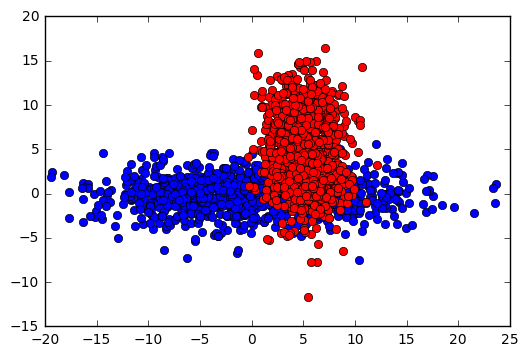

In [4]:
# Create points
sizeOfClusters = 1000

cluster1 = pd.DataFrame(columns=["x","y","cluster"])
for i in range(sizeOfClusters):
    # This will make a cluster of points centered around (0,0), with sd = 1
    x = random.gauss(0,7) # gauss(mean, sd) (guassian distribution <=> normal distribution)
    y = random.gauss(0,2)
    cluster1.loc[i] = [x,y,1]
    
cluster2 = pd.DataFrame(columns=["x","y","cluster"])
for i in range(sizeOfClusters):
    # This will make a cluster of points centered around (5,5), with sd = 1
    x = random.gauss(5,2)
    y = random.gauss(5,4)
    cluster2.loc[i] = [x,y,2]

plt.plot(cluster1.x,cluster1.y,'bo')
plt.plot(cluster2.x,cluster2.y,'ro')
plt.show()

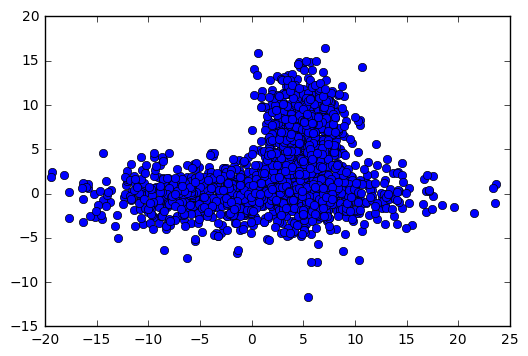

Oh no! What are the clusters...


In [5]:
# Now we combine the datasets, and you have to disentangle them with k-means
clusterF = pd.concat([cluster1,cluster2])

# This is randomly shuffling the dataset
clusterF_shuffled=clusterF.iloc[np.random.permutation(len(clusterF))]
clusterF_shuffled=clusterF_shuffled.reset_index(drop=True)
clusterF_unlabelled = clusterF_shuffled.copy(deep=True)

# Now we obscure the cluster labels
clusterF_unlabelled["cluster"] = np.nan

# Finally plot
plt.plot(clusterF_unlabelled["x"],clusterF_unlabelled["y"],'bo')
plt.show()
print("Oh no! What are the clusters...")

In [6]:
clusterF_unlabelled.head()

,x,y,cluster
0,5.159366,2.916173,NaN
1,3.405362,11.731507,NaN
2,4.468665,2.445808,NaN
3,7.788243,8.991301,NaN
4,8.706691,4.567866,NaN


In [7]:
clusterF_shuffled.head()

,x,y,cluster
0,5.159366,2.916173,2.0
1,3.405362,11.731507,2.0
2,4.468665,2.445808,2.0
3,7.788243,8.991301,2.0
4,8.706691,4.567866,2.0


## Let's think about how k-means is working
> From sklearn documentation:
K-means is often referred to as Lloyd’s algorithm. In basic terms, the algorithm has three steps. The first step chooses the initial centroids, with the most basic method being to choose k samples from the dataset X. After initialization, K-means consists of looping between the two other steps. The first step assigns each sample to its nearest centroid. The second step creates new centroids by taking the mean value of all of the samples assigned to each previous centroid. The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this value is less than a threshold. In other words, it repeats until the centroids do not move significantly.

Remember something that might be a bit confusing: although you may have heard that the objective in k-means clustering is explicitly to minimise the within-cluster variation (so referring to the sum of square distances between data points), this is actually too difficult to solve directly since there are so many different possible partitions between all data points. Therefore what we actually do is solve a simpler problem related to the absolute value of the distance from the (initially randomly assigned) centroids to each data point. In practice this is _almost_ the same thing and is certainly a lot easier to implement.

> From _An Introduction to Statistical Learning_:
1. Randomly assign a number, from 1 to K, to each of the observations. These serve as initial cluster assignments for the observations.
- Iterate until the cluster assignment stops changing:
    a) For each of the K clusters, compute the cluster centroid. The kth cluster centroid is the vector of the p feature means for the observations in the kth cluster
    b) Assign each observation to the cluster whose centroid is closest (where closes is defined using Euclidean distance)
    
Where _Euclidean distance_ is the ordinary distance between two points that in a two-dimensional space you would find with Pythagoras' theorem (but feel free to implement a numpy/scipy function for this).

In [8]:
# You could just assume k=2.  You don't have to write the code to be able to generalize to any k on the first pass. 
# The idea is you can use numpy/scipy, so you don't have to do everything in raw python, but of course not sklearn.

def kmeans(X, k = 2):
    choice = np.random.choice(len(X), k, replace=False)
    centroids = X[choice]
    print("Centroids ({}): {}".format(0, str(centroids)[:80]))
    for i in range(len(X)*2):
        clusters = [list() for _ in range(k)]
        y = []
        for x in X:
            centroid_distances = [(distance.euclidean(x, centroid), cluster_no) for cluster_no, centroid in enumerate(centroids)]
            _, cluster_no = sorted(centroid_distances)[0]
            y.append(cluster_no)
            clusters[cluster_no].append(x)
        previous_centroids = list(centroids)    
        centroids = [np.mean(clusters[cluster_no], axis=0) for cluster_no in range(k)]
        print("Centroids ({}): {}".format(i+1, str(centroids)[:80]))
        if np.all(np.abs(np.array(previous_centroids) - np.array(centroids)) < 0.00001):
            return y, centroids
    print("Never converged")
    return y, centroids

In [9]:
clusterF_unlabelled["cluster"], centroids = kmeans(clusterF_unlabelled[['x','y']].values, k=2)

Centroids (0): [[ -7.9927046   -1.11930962]
 [-10.7477256   -0.02665221]]
Centroids (1): [array([ 3.46315189,  2.54906637]), array([-12.01429081,   0.40776754])]
Centroids (2): [array([ 4.55751245,  2.90899894]), array([-8.3714335 , -0.32281774])]
Centroids (3): [array([ 5.07087401,  3.15074934]), array([-6.71919655, -0.35790368])]
Centroids (4): [array([ 5.30462173,  3.29020612]), array([-5.96840401, -0.36584857])]
Centroids (5): [array([ 5.38857918,  3.34895039]), array([-5.67412337, -0.36805353])]
Centroids (6): [array([ 5.40438373,  3.36366795]), array([-5.61023683, -0.37534429])]
Centroids (7): [array([ 5.42143627,  3.37387053]), array([-5.55107984, -0.36857563])]
Centroids (8): [array([ 5.43114   ,  3.38147647]), array([-5.51440986, -0.36892288])]
Centroids (9): [array([ 5.43783308,  3.38585243]), array([-5.49080835, -0.36703423])]
Centroids (10): [array([ 5.44110072,  3.38825641]), array([-5.47882374, -0.36672367])]
Centroids (11): [array([ 5.44458615,  3.39000406]), array([-5.4

In [10]:
clusterF_unlabelled.head()

,x,y,cluster
0,5.159366,2.916173,0
1,3.405362,11.731507,0
2,4.468665,2.445808,0
3,7.788243,8.991301,0
4,8.706691,4.567866,0


In [11]:
centroids

[array([ 5.45585931,  3.39288914]), array([-5.43618616, -0.35076325])]

### Now confirm that you have clustered the data properly by plotting it, using a different color for each cluster
Hint: refer to where I plotted the data in blue and red in the code cell near the top of this notebook.

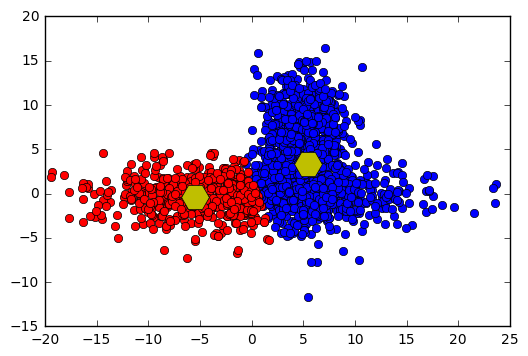

In [12]:
styles = ['bo','ro','go','yo','b>','rv','g^', 'y<']*len(centroids)

for i in range(len(centroids)):
    c = clusterF_unlabelled[clusterF_unlabelled["cluster"] == i]
    plt.plot(c.x, c.y, styles[i])
    plt.plot(centroids[i][0],centroids[i][1],'y', marker='H', markersize=20)
plt.show()

### What do you think will happen if we change the input data means to be closer together, or increase the standard deviations?